<div class="alert alert-block alert-info">
<center> <h1> Text Mining - Predicting Airbnb Unlisting</h1> </center> <br>
<center> Group 17 </center>

**University:** NOVA Information Management School<br/>
**Program:** Master’s Degree Program in Data Science and Advanced Analytics<br/>
**Academic Year:** 2022/2023

```
============== Students: ==================
Iryna Savchuk (m20211310@novaims.unl.pt)
Cátia Parrinha (m20201320@novaims.unl.pt)
Pedro Anastácio (m20180040@novaims.unl.pt)
===========================================
```

**Table of Contents** <br>
* [1.Data Import](#IMPORT)
    * [1.1.Import Libraries](#LIBS)
    * [1.2.Import Datasets](#DATASETS)
* [2.Data Exploration](#EXPLORATION)
    * [2.1. Missing Data](#MISSING)
    * [2.2. Duplicates](#DUBS)
    * [2.3. Visualizations](#VIZ)
    * [2.4. Word Count](#WCOUNT)
        
* [3.Data Preprocessing](#PRE)
* [4.Classification Models](#CLMODELS)
    * [4.1. Define training features - Bag of Words (Bow)](#bow)
* [5.Evaluation](#EVAL)

<hr>
<a class="anchor" id="">
    
# 1. Data Import
    
</a>

<hr>
<a class="anchor" id="LIBS">
    
## 1.1. Import Libraries
    
</a>

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from collections import Counter
# Profile Report
import pandas_profiling
# Visualization
from sklearn.manifold import TSNE

# Clean Data
from bs4 import BeautifulSoup

# Tokenization
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer

# Language Detection
from langdetect import detect

# Translator
#from googletrans import Translator
import os

# Punctuation
import string

# Stop Words
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')

# Regular Expressions
import re

# Stemming and Lemmatization
from nltk.stem import SnowballStemmer, WordNetLemmatizer, PorterStemmer

# for displaying progress bars during iterative tasks
from tqdm import tqdm

# Data Partition
from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedStratifiedKFold

# Create BoW - Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

# Evaluation and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/pedroanastacio/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pedroanastacio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<hr>
<a class="anchor" id="DATASETS">
    
## 1.2. Import Datasets
    
</a>

In [89]:
df_train = pd.read_excel('/Users/pedroanastacio/TM_project/Project Corpora/train.xlsx')
df_test = pd.read_excel('/Users/pedroanastacio/TM_project/Project Corpora/test.xlsx')
df_reviews_train = pd.read_excel('/Users/pedroanastacio/TM_project/Project Corpora/train_reviews.xlsx')
df_reviews_test = pd.read_excel('/Users/pedroanastacio/TM_project/Project Corpora/test_reviews.xlsx')

In [90]:
#df_train.head()
#df_test.head()
#df_reviews_train.head()
df_reviews_test.head()

,index,comments
0,1,Thank you very much Antonio ! All has been per...
1,1,Very nice appartment in the old town of Lissab...
2,1,When travelling we're looking for kids friendl...
3,1,We've been in Lisbon in march 2013 (3 adults a...
4,1,Our host Antonio was very helpful with informa...


In [91]:
# Set Index
df_train = df_train.set_index('index')
df_test = df_test.set_index('index')
df_reviews_train = df_reviews_train.set_index('index')
df_reviews_test = df_reviews_test.set_index('index')

In [92]:
#df_train.head()
#df_test.head()
df_reviews_train.head() 
#df_reviews_test.head()

,comments
index,
1,this is a very cozy and comfortable house to s...
1,good<br/>
1,"My first hostel experience, and all I have to ..."
1,Das Hostel war neu und deshalb funktionierte a...
1,"It was fine for a dorm, but I think for the pe..."


<hr>
<a class="anchor" id="EXPLORATION">
    
# 2. Data Exploration
    
</a>

In [93]:
df_train.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<div class="alert alert-block alert-danger">  
The <b>train</b> dataset has an unbalanced Target variable with 72.3% of the data being "0"
</div>

In [94]:
df_reviews_train.describe().T

,count,unique,top,freq
comments,721402,705644,.,908


<a class="anchor" id="MISSING">

## 2.1 Missing Data

</a>

In [95]:
df_train.isna().sum()

description    0
host_about     0
unlisted       0
dtype: int64

<div class="alert alert-block alert-success">
    There are no missing values on the <b> train </b> dataset
</div>

In [96]:
df_reviews_train.isna().sum()

comments    0
dtype: int64

<div class="alert alert-block alert-success">
    There are no missing values on the <b> train_reviews </b> dataset
</div>

<a class="anchor" id="DUBS">

## 2.2 Duplicates

</a>

In [97]:
print('Number of duplicate rows in df_train["description"]')
print(df_train["description"].duplicated().sum())
print('Number of duplicate rows in df_train["host_about"]')
print(df_train["host_about"].duplicated().sum())

Number of duplicate rows in df_train["description"]
708
Number of duplicate rows in df_train["host_about"]
8100


In [98]:
print('Number of duplicate rows in df_reviews_train["comments"]')
df_reviews_train["comments"].duplicated().sum()

Number of duplicate rows in df_reviews_train["comments"]


15758

<a class="anchor" id="VIZ">

## 2.3 Visualizations

</a>

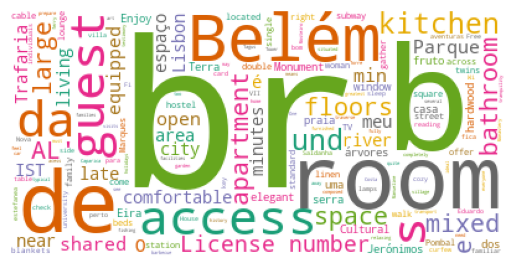

In [99]:
# Word Cloud of the feature "description" from df_train
wordcloud = WordCloud(
    background_color='white', 
    max_words=500, 
    colormap='Dark2',
    contour_width=4).generate(str(df_train["description"].values))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

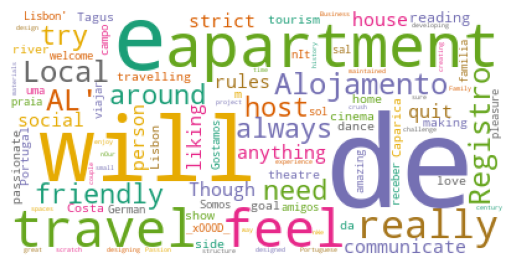

In [100]:
# Word Cloud of "host_about" from df_train
wordcloud = WordCloud(
    background_color='white', 
    max_words=500,
    colormap='Dark2',
    contour_width=4).generate(str(df_train["host_about"].values))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

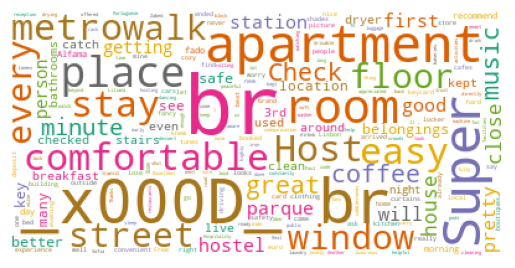

In [101]:
# Word Cloud of "comments" from df_reviews_train
wordcloud = WordCloud(
    background_color='white', 
    max_words=500,
    colormap='Dark2',
    contour_width=4).generate(str(df_reviews_train["comments"].values))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<a class="anchor" id="WCOUNT">

## 2.4 Word Count

</a>

In [102]:
# Fetch wordcount for each abstract
df_train["description_count"]  = df_train["description"].apply(lambda x: len(str(x).split(" ")))
df_train["host_count"]  = df_train["host_about"].apply(lambda x: len(str(x).split(" ")))
df_train.head()

,description,host_about,unlisted,description_count,host_count
df_index,,,,,
1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,127,4
2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1,23,24
3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1,170,45
4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0,47,31
5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0,101,37


In [103]:
# Statists for word count
df_train.description_count.describe()

count    12496.000000
mean       132.663572
std         48.494104
min          3.000000
25%         99.000000
50%        157.000000
75%        167.000000
max        210.000000
Name: description_count, dtype: float64

<AxesSubplot:>

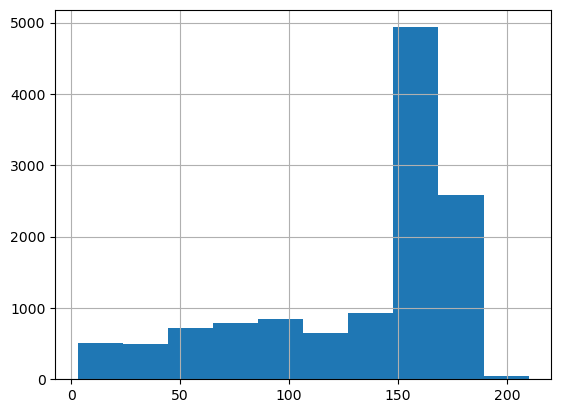

In [104]:
df_train["description_count"].hist()

In [105]:
df_train.host_count.describe()

count    12496.000000
mean        73.031050
std         77.132867
min          1.000000
25%         26.000000
50%         55.000000
75%        102.000000
max       1387.000000
Name: host_count, dtype: float64

<AxesSubplot:>

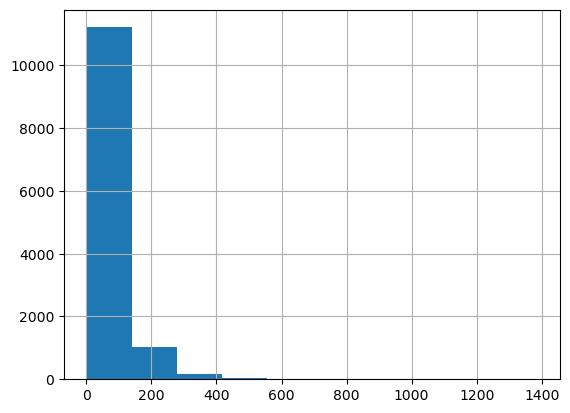

In [106]:
df_train["host_count"].hist()

In [107]:
# Counting the frequency of each individual word
allDescriptionW = ' '.join(df_train["description"]).split()
allHostW = ' '.join(df_train['host_about']).split()
freqDescripW = pd.Series(allDescriptionW).value_counts()
freqHostW = pd.Series(allHostW).value_counts()

In [108]:
freqDescripW.sort_values(ascending=False)[0:10]

the      62717
and      54907
a        50700
/><br    34826
to       30520
of       30050
in       28007
with     27033
is       23957
de       13708
dtype: int64

In [109]:
freqHostW.sort_values(ascending=False)[0:10]

and    32569
to     26540
the    21488
a      21184
in     19515
I      12752
of     12752
you    12511
de      8739
We      8457
dtype: int64

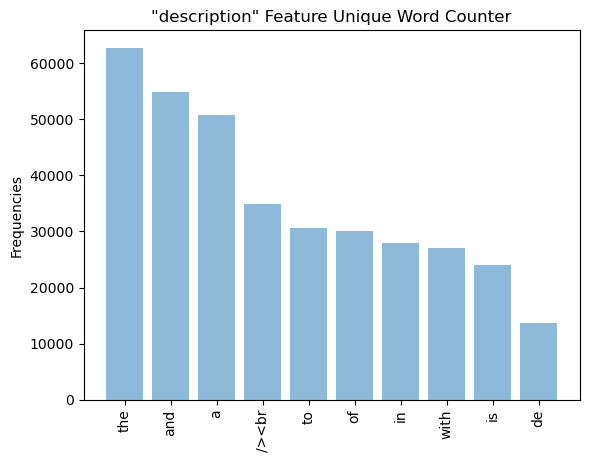

In [110]:
x_labels = freqDescripW.index[0:10]
values = freqDescripW[:10]
plt.bar(x_labels, values, align='center', alpha=0.5)
plt.xticks(x_labels)
plt.ylabel('Frequencies')
plt.title('"description" Feature Unique Word Counter')
plt.xticks(rotation=90)
plt.show()

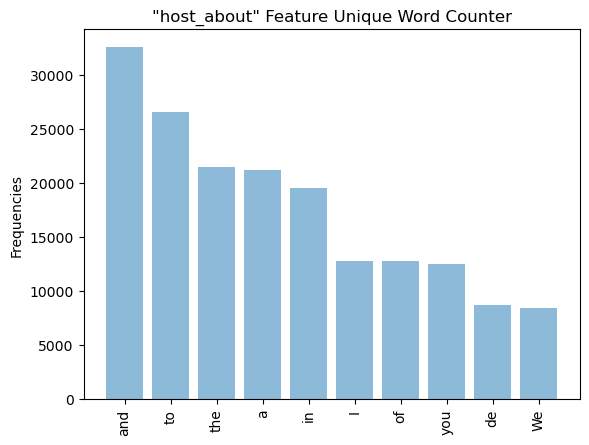

In [111]:
x_labels = freqHostW.index[0:10]
values = freqHostW[:10]
plt.bar(x_labels, values, align='center', alpha=0.5)
plt.xticks(x_labels)
plt.ylabel('Frequencies')
plt.title('"host_about" Feature Unique Word Counter')
plt.xticks(rotation=90)
plt.show()

<a class="anchor" id="DETECTION">

## 2.4 Language Detection

</a>

In [112]:
def detect_language(text):
    try:
        lang = detect(text)
    except:
        lang = None
    return lang

In [113]:
df_train.to_csv('output/train.csv', index=False)
df_reviews_train.to_csv('output/train_reviews.csv', index=False)

In [114]:
# Detecting df_train features languages 
source_file = 'output/train.csv'
destination_file = 'output/train_language.csv'

chunk_size = 1000
chunk_iterator = pd.read_csv(source_file, chunksize=chunk_size)

# Processing data in chunks
for chunk in tqdm(chunk_iterator):   
    chunk['description_language'] = chunk['description'].apply(detect_language)
    chunk['host_language'] = chunk['host_about'].apply(detect_language)
    chunk.to_csv(destination_file, 
                 index=False, 
                 mode='a', 
                 header=not os.path.exists(destination_file))

13it [01:47,  8.27s/it]


In [115]:
df_train = pd.read_csv('output/train_language.csv')
df_train.head()

,description,host_about,unlisted,description_count,host_count,description_language,host_language
0,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,127,4,en,pt
1,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1,23,24,pt,en
2,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1,170,45,en,en
3,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0,47,31,pt,en
4,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0,101,37,fr,fr


In [116]:
# Detecting df_reviews_train feature languages 
source_file = 'output/train_reviews.csv'
destination_file = 'output/reviews_language.csv'

chunk_size = 1000
chunk_iterator = pd.read_csv(source_file, chunksize=chunk_size)

# Processing data in chunks
for chunk in tqdm(chunk_iterator):
    chunk['comments_language'] = chunk['comments'].apply(detect_language)
    chunk.to_csv(destination_file, 
                 index=False, 
                 mode='a', 
                 header=not os.path.exists(destination_file))

722it [37:38,  3.13s/it]


In [117]:
df_reviews_train = pd.read_csv('output/reviews_language.csv')
df_reviews_train.iloc[1000:1110, :]

,comments,comments_language
1000,"A well equipt, clean unit in an ideal location...",en
1001,Great place!,en
1002,Joao and his colleagues are all very kind and ...,en
1003,L'appartement est très bien. L'agence est top ...,fr
1004,1ère visite de Lisbonne: le logement est situé...,fr
...,...,...
1105,"Newly, well located, fully equipped and clean ...",en
1106,"Very nice place! Great location, very helpful ...",en
1107,The appartement was pretty and of good taste o...,en
1108,Wonderful little apartment in a beautiful city!,en


In [55]:
# Detect language of 'description' and 'host_about' columns in df_train, and 'comments' column in df_reviews_train
#df_train, df_reviews_train = detect_language(df_train, 'description', 'host_about', df_reviews_train, 'comments')

<a class="anchor" id="VIZ">

## 3 Preprocessing

</a>

In the data exploration phase it was detected that not only multiple languages were detected but also that there is some noise in the features containing sentences.
#### 1 Remove the noise by applying BeautifulSoup


<a class="anchor" id="DETECTION">

## 3.1 Remove HTML tags

</a>

In [25]:
def clean_html_tags(df1, column1_1, column1_2, df2, column2):
    """Function that removes HTML tags from columns containing strings and takes as input 2 daframes and 3 columns, 2 from 1 dataframe and 1 from another."""
    # Remove HTML tags from df1[column1_1] using BeautifulSoup
    df1[column1_1] = df1[column1_1].apply(lambda x: BeautifulSoup(x, "html.parser").get_text(separator=" ") if isinstance(x, str) else x)

    # Remove extra whitespaces and newline characters from df1[column1_1]
    df1[column1_1] = df1[column1_1].apply(lambda x: re.sub(r'\s+', ' ', x).strip() if isinstance(x, str) else x)

    # Remove HTML tags from df1[column1_2] using BeautifulSoup
    df1[column1_2] = df1[column1_2].apply(lambda x: BeautifulSoup(x, "html.parser").get_text(separator=" ") if isinstance(x, str) else x)

    # Remove extra whitespaces and newline characters from df1[column1_2]
    df1[column1_2] = df1[column1_2].apply(lambda x: re.sub(r'\s+', ' ', x).strip() if isinstance(x, str) else x)

    # Remove HTML tags from df2[column2] using BeautifulSoup
    df2[column2] = df2[column2].apply(lambda x: BeautifulSoup(x, "html.parser").get_text(separator=" ") if isinstance(x, str) else x)

    # Remove extra whitespaces and newline characters from df2[column2]
    df2[column2] = df2[column2].apply(lambda x: re.sub(r'\s+', ' ', x).strip() if isinstance(x, str) else x)

    return df1, df2

In [26]:
# Clean HTML tags from 'description' and 'host_about' columns in df_train, and 'comments' column in df_reviews_train
df_train, df_reviews_train = clean_html_tags(df_train, 'description', 'host_about', df_reviews_train, 'comments')

/Users/pedroanastacio/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [27]:
df_train.head()

,description,host_about,unlisted,descriptionWcount,hostWcount
df_index,,,,,
1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,127,4
2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1,23,24
3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1,170,45
4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_ I m Portuguese and i love to mee...,0,47,31
5,Joli appartement en bordure de mer. 2 min. a p...,Nous sommes une famille avec deux enfants de 1...,0,101,37


In [28]:
df_reviews_train.head()

,comments
index,
1,this is a very cozy and comfortable house to s...
1,good
1,"My first hostel experience, and all I have to ..."
1,Das Hostel war neu und deshalb funktionierte a...
1,"It was fine for a dorm, but I think for the pe..."


#### Tokenize

In [29]:
def tokenize_columns(df1, column1_1, column1_2, df2, column2):
    # Tokenize columns in df1
    df1[column1_1] = df1[column1_1].apply(word_tokenize)
    df1[column1_2] = df1[column1_2].apply(word_tokenize)

    # Tokenize column in df2
    df2[column2] = df2[column2].apply(word_tokenize)

    return df1, df2

In [30]:
# Tokenize 'Text1_1', 'Text1_2' columns in df1 and 'Text2' column in df2
tokenized_df1, tokenized_df2 = tokenize_columns(df_train, 'description', 'host_about', df_reviews_train, 'comments')

print(tokenized_df1)
print(tokenized_df2)


TypeError: expected string or bytes-like object

In [ ]:
df_train.head()

In [ ]:
df_reviews_train.head()

### Steps that could be explored
- Remove Punctuation
- Remove Stop words
- Normalize (apply Stemmer or Lemmatizer)
- Set all characters to lowercase
- Remove numbers (or convert numbers to text)

In [ ]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess(sentence, remove_punctuation=False, remove_stopwords=False, normalize=stemmer, lowercase=False, edit_numbers=convert):
    """Input: Sentence
       Output: Sentence
       Pre processing step for a pandas dataset"""
    # change input sentence into string data type
    sentence=str(sentence)
    if remove_punctuation:
        
    if remove_stopwords:
        
        
    normalize
        
    if lowercase:
        sentence=sentence.lower()
    edit_numbers
        
    
    sentence=sentence

In [115]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess(sentence):
    
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '', cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words = [stemmer.stem(w) for w in filtered_words]
    lemma_words = [lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

df_train_clean = df_train
df_train_clean["description"] = df_train_clean["description"].map(lambda s:preprocess(s))
df_train_clean["host_about"] = df_train_clean["host_about"].map(lambda s:preprocess(s))
df_train_clean.head()

In [123]:
df_train_clean["host_about"] = df_train_clean["host_about"].map(lambda s:preprocess(s))

In [124]:
df_train_clean.head()

,description,host_about,unlisted
index,,,
1,shared mixed room hostel shared bathroom locat...,alojamento local registro,0
2,meu espaço fica perto parque eduardo vii salda...,friendly host try always around need anything ...,1
3,trafaria house cozy familiar villa facilities ...,social person liking communicate reading trave...,1
4,apartamento charmoso chiado entre largo carmo ...,hello _xd_ portuguese love meet people around ...,0
5,joli appartement bordure mer min pied plage vu...,nous sommes une famille avec deux enfants ans ...,0


## N-Grams
#### Create a new feature with n-grams
an n-gram is a contiguous sequence of n items from a given sample of text or speech

In [125]:
def ngrams(input, n):
    
    output = []
    for i in range(len(input)-n+1):
        output.append('_'.join(input[i:i+n]))
    return output

In [126]:
nltk.download('punkt')
tags = ['0', '1']

df_train_bis = df_train_clean[df_train_clean.unlisted.isin(tags)]

# Create n-grams
df_train_bis['tokens'] = df_train_bis.apply(lambda row: nltk.word_tokenize(row['text'].strip()), axis=1)
df_train_bis['bi_Grams'] = df_train_bis.apply(lambda row: ngrams(row['tokens'], 2), axis=1)
df_train_bis['tri_Grams'] = df_train_bis.aply(lambda row: ngrams(row['tokens'], 3), axis=1)
print(len(df_train_bis),'samples from', len(tags),'decision')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pedroanastacio/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


ValueError: Cannot set a DataFrame with multiple columns to the single column tokens

### Checking label proportion

### Checking for duplications

In [12]:
duplicated_descriptions = df_train_raw['description'][df_train_raw['description'].duplicated(keep=False)].unique()
duplicated_host_abouts = df_train_raw['host_about'][df_train_raw['host_about'].duplicated(keep=False)].unique()

print('The number of unique duplicated descriptions:', len(duplicated_descriptions))
print('The number of unique duplicated host_about values:', len(duplicated_host_abouts))

The number of unique duplicated descriptions: 365
The number of unique duplicated host_about values: 1673


In [13]:
duplicated_1 = "Saldanha Prestige is a classy and quality apartment that has been totally renovated this year in order to prepare the 9 rooms and all the common areas to welcome our Guests with all the best confort. From here you'll be able to enjoy all the best Lisboa has to offer! Come and stay with us - you're always welcome! I've been a proud Airbnb host for 2 years and have very good reviews.<br /><br /><b>The space</b><br />The apartment was totally renovated this year and has 7 rooms with shared bathrooms and 2 with their own private bathrooms. Included in the price are the common expenses, Wi-fi internet throughout the apartment, cleaning service of all common areas three times a week and also of the rooms once a week. Rooms are confortably furnished with good beds and guests are supplied with bath towels and bed linens.<br /><br /><b>Guest access</b><br />All the rooms have access to a beautiful living room with TV, a completely equiped kitchen with all equipments: tableware, fridges, freezer"

In [14]:
df_train_raw.loc[df_train_raw['description']==duplicated_1]

,index,description,host_about,unlisted
98,99,Saldanha Prestige is a classy and quality apar...,Família_x000D_\nPortugal_x000D_\nGavião_x000D_...,0
3581,3582,Saldanha Prestige is a classy and quality apar...,Família_x000D_\nPortugal_x000D_\nGavião_x000D_...,0
4090,4091,Saldanha Prestige is a classy and quality apar...,Família_x000D_\nPortugal_x000D_\nGavião_x000D_...,0
4859,4860,Saldanha Prestige is a classy and quality apar...,Família_x000D_\nPortugal_x000D_\nGavião_x000D_...,0
5381,5382,Saldanha Prestige is a classy and quality apar...,Família_x000D_\nPortugal_x000D_\nGavião_x000D_...,0
6649,6650,Saldanha Prestige is a classy and quality apar...,Família_x000D_\nPortugal_x000D_\nGavião_x000D_...,0
7378,7379,Saldanha Prestige is a classy and quality apar...,Família_x000D_\nPortugal_x000D_\nGavião_x000D_...,0
8873,8874,Saldanha Prestige is a classy and quality apar...,Família_x000D_\nPortugal_x000D_\nGavião_x000D_...,0


In [15]:
duplicated_2 = '<b>Other things to note</b><br />For your information, we are carrying out work in the apartment and because of this the kitchen will not be available, for the month of February there will be men working from 9 am to 5 pm. To compensate, you pay much less than -50% of the price usual.<br /><br /><b>License number</b><br />104691/AL'

In [16]:
df_train_raw.loc[df_train_raw['description']==duplicated_2]

,index,description,host_about,unlisted
92,93,<b>Other things to note</b><br />For your info...,.,1
5352,5353,<b>Other things to note</b><br />For your info...,.,0
9285,9286,<b>Other things to note</b><br />For your info...,.,1


### Summary of Exploratory Analysis

The original 'train' dataset contains 12496 rows and 4 columns: 'index', 'description', 'host_about', 'unlisted'. The 'unlisted' column is the target variable and is to be predicted based on other values.

Based on the wordclouds, it can be seen that the given dataset contains languages other then English - at least Portuguese(see the words like 'de', 'e', 'Alojamento', 'Belém', 'praia') and German('und', 'ist' and others). Also, there is a number of tags (such as "\<br />" and "\<b>") in our data as well as sequences of characters that are obtained after import from an Excel file (such as "_x000D_\n"). 
 
The dataset does not have any empty values. 

It turned out, some rows have the same values for both 'description' and 'host_about' columns, wheras 'unlisted' values are different. It means that using only 'train' dataset might be not enough for the project purpose and we might want to utilize 'reviews' data as well.